In [5]:
import matplotlib.pyplot as plt

from prep_terrain_data import make_terrain_data
from class_vis import pretty_picture

In [6]:
features_train, labels_train, features_test, labels_test = make_terrain_data()

the training data (`features_train`, `labels_train`) have both `"fast"` and `"slow"` points mixed together
separate them so we can give them different colors in the scatterplot and identify them visually

In [7]:
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii] == 0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii] == 0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii] == 1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii] == 1]

initial visualization

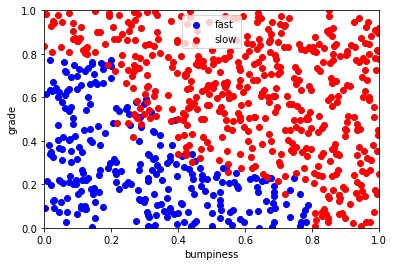

In [8]:
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

## ↓↓↓ Your Code Goes Here ↓↓↓

name your classifier object `clf` if you want the visualization code `pretty_picture` to show you the decision boundary

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [19]:
clf = AdaBoostClassifier(n_estimators=50, learning_rate = 0.1,algorithm='SAMME.R')
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

In [20]:
accuracy_score(pred,labels_test)

0.916

In [13]:
param_dist = {
 'n_estimators': [25, 50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1,1.1],
  'algorithm': ['SAMME', 'SAMME.R']
 }

clf_search = RandomizedSearchCV(AdaBoostClassifier(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10)

search = clf_search.fit(features_train, labels_train)
search.best_estimator_.get_params()

{'n_estimators': 50, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}

In [14]:
search.cv_results_

{'mean_fit_time': array([0.0538516 , 0.02824656, 0.10439618, 0.11168989, 0.02825697,
        0.03058958, 0.05684805, 0.05619637, 0.05817787, 0.17087372]),
 'std_fit_time': array([0.00424741, 0.00047433, 0.0038461 , 0.00355462, 0.00047757,
        0.00123326, 0.00081439, 0.00125495, 0.00542249, 0.05895503]),
 'mean_score_time': array([0.00399892, 0.003335  , 0.00729505, 0.01198665, 0.00365003,
        0.00365003, 0.00664862, 0.00631452, 0.00698415, 0.0162909 ]),
 'std_score_time': array([1.53976487e-05, 4.64612544e-04, 4.60912482e-04, 1.39487887e-05,
        4.89366600e-04, 4.81204864e-04, 4.70077941e-04, 4.67155679e-04,
        1.41534742e-03, 2.61669991e-03]),
 'param_n_estimators': masked_array(data=[50, 25, 100, 100, 25, 25, 50, 50, 50, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 1.1, 1, 0.01, 0.01, 0.3, 0.1, 1.

In [21]:
pred2 = search.predict(features_test)

In [22]:
accuracy_score(pred2,labels_test)

0.916

C:\Users\Margarida\Documents\Udacity\ud120-projects-py3-jupyter\05-choose-your-own\class_vis.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='seismic')


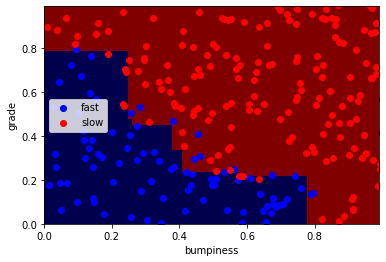

In [16]:
try:
    pretty_picture(search, features_test, labels_test)
except NameError:
    pass